In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


### import librares

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [3]:
df=pd.read_csv('/kaggle/input/sales-forecasting/train.csv')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Notes :
    - change column type[Order Date ,Ship Date ,Postal Code]
    - null values : Postal Code

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3658,3659,CA-2016-128083,12/03/2016,17/03/2016,Standard Class,EB-13750,Edward Becker,Corporate,United States,Plantation,Florida,33317.0,South,FUR-FU-10003194,Furniture,Furnishings,"Eldon Expressions Desk Accessory, Wood Pencil ...",30.880
306,307,CA-2015-111003,01/06/2015,06/06/2015,Standard Class,CR-12625,Corey Roper,Home Office,United States,Lakewood,New Jersey,8701.0,East,OFF-BI-10001072,Office Supplies,Binders,"GBC Clear Cover, 8-1/2 x 11, unpunched, 25 cov...",45.480
328,329,US-2017-141544,30/08/2017,01/09/2017,First Class,PO-18850,Patrick O'Brill,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,FUR-CH-10003312,Furniture,Chairs,Hon 2090 “Pillow Soft” Series Mid Back Swivel/...,786.744
1294,1295,CA-2016-101707,27/08/2016,01/09/2016,Standard Class,PF-19165,Philip Fox,Consumer,United States,San Diego,California,92105.0,West,OFF-LA-10000134,Office Supplies,Labels,Avery 511,3.080
4235,4236,CA-2015-168823,21/09/2015,24/09/2015,First Class,MA-17560,Matt Abelman,Home Office,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-LA-10004425,Office Supplies,Labels,Staple-on labels,20.808


In [8]:
## detect duplicate
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


#### Note :
    - no duplicate

In [9]:
# null values in each columns
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
# null values in all df
df.isnull().sum().sum()

11

In [11]:
## see null rows
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [12]:
# to know how many column have state= new york
e=df[df['State']=='New York']
e.count()  

Row ID           1097
Order ID         1097
Order Date       1097
Ship Date        1097
Ship Mode        1097
Customer ID      1097
Customer Name    1097
Segment          1097
Country          1097
City             1097
State            1097
Postal Code      1097
Region           1097
Product ID       1097
Category         1097
Sub-Category     1097
Product Name     1097
Sales            1097
dtype: int64

### Notes:
    - all null values = vermont ---> pstal code from google = 5401

In [13]:
df['Postal Code']= df['Postal Code'].fillna(5401)

In [14]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [15]:
### column type 
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%Y') 
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d/%m/%Y') 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

-------------------------------------------

#### Categorical Columns : Ship Mode ,Country ,City ,State,Postal Code,Category,Sub-Category
#### Numrice Columns :sales

In [17]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

<AxesSubplot:ylabel='Ship Mode'>

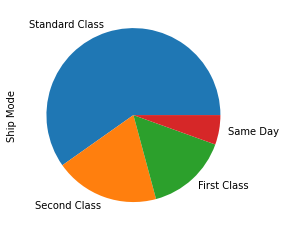

In [18]:
df['Ship Mode'].value_counts().plot.pie()

<AxesSubplot:>

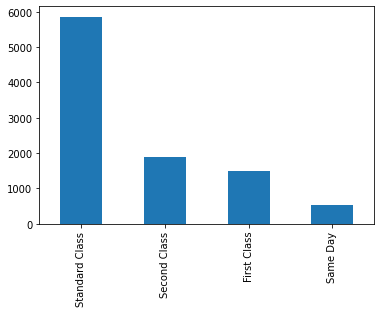

In [19]:
df['Ship Mode'].value_counts().plot.bar()

#### Notes:
    - 60% of Ship mode : Standerd
    - 40% of Ship mode : secound class

In [20]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

<AxesSubplot:ylabel='Segment'>

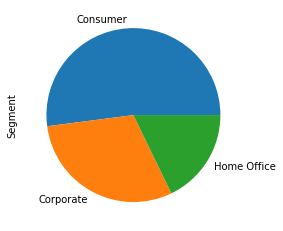

In [21]:
df['Segment'].value_counts().plot.pie()

#### Noes:
    - 55% usere Consumer
    - 35 corprate

In [22]:
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

#### Notes :
    - all sales in USA

In [23]:
df['City'].value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

#### Notes :
    - more than 500 city 
    - attention hight sales cities


----------------------------------------

Text(0.5, 1.0, 'Ship Mode')

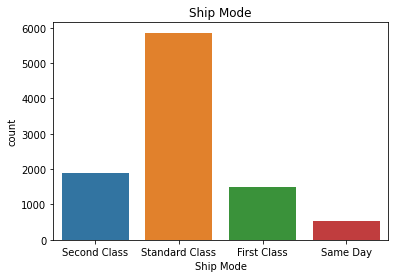

In [24]:
sns.countplot(x='Ship Mode',data=df)
plt.title('Ship Mode')

<AxesSubplot:xlabel='Category', ylabel='count'>

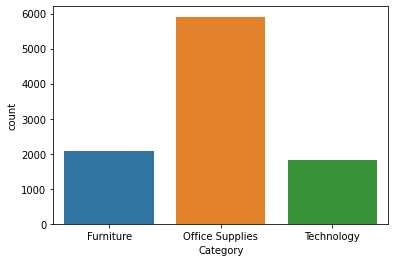

In [25]:
sns.countplot(x='Category',data=df)

#### Notes:
    - office supplies ----> high orders
    - office supplies get orders more than rest of all categorise

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

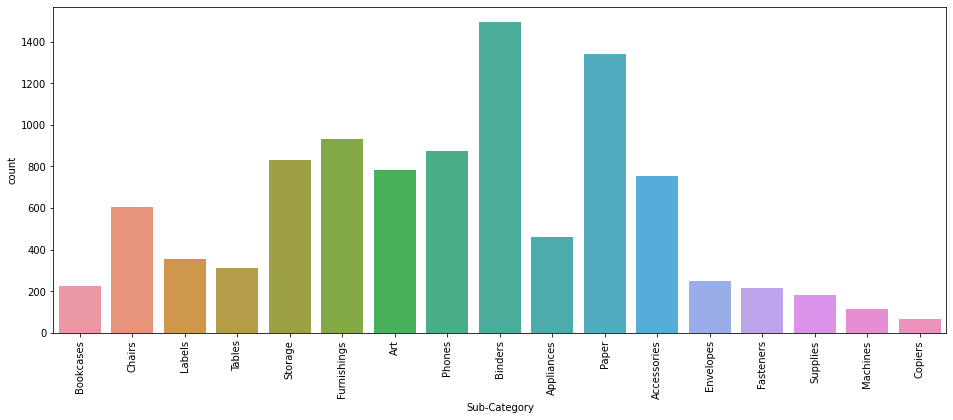

In [26]:
plt.figure(figsize=(16,6))
sns.countplot(x='Sub-Category',data=df)
# to sho the names as vertical
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Kentucky'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Wisconsin'),
  Text(7, 0, 'Utah'),
  Text(8, 0, 'Nebraska'),
  Text(9, 0, 'Pennsylvania'),
  Text(10, 0, 'Illinois'),
  Text(11, 0, 'Minnesota'),
  Text(12, 0, 'Michigan'),
  Text(13, 0, 'Delaware'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'New York'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Virginia'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Alabama'),
  Text(20, 0, 'South Carolina'),
  Text(21, 0, 'Oregon'),
  Text(22, 0, 'Colorado'),
  Text(23, 0, 'Iowa'),
  Text(24, 0, 'Ohio'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Oklahoma'),
  Text(27, 0, 'New Mexico'),
  Text(28, 0, 'Louisiana'),


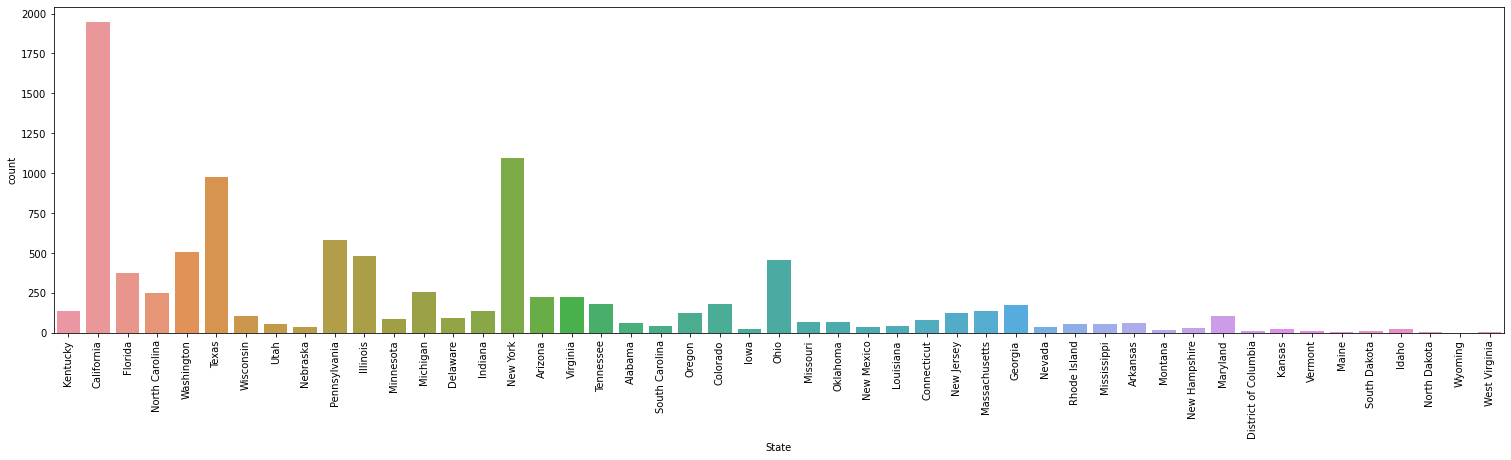

In [27]:
plt.figure(figsize=(26,6))
sns.countplot(x='State',data=df)
# to sho the names as vertical
plt.xticks(rotation='vertical')

### Top 15 States in Sales

In [28]:
top_states=df.groupby('State').sum().sort_values('Sales',ascending=False).head(15)
top_states=top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)
top_states

,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


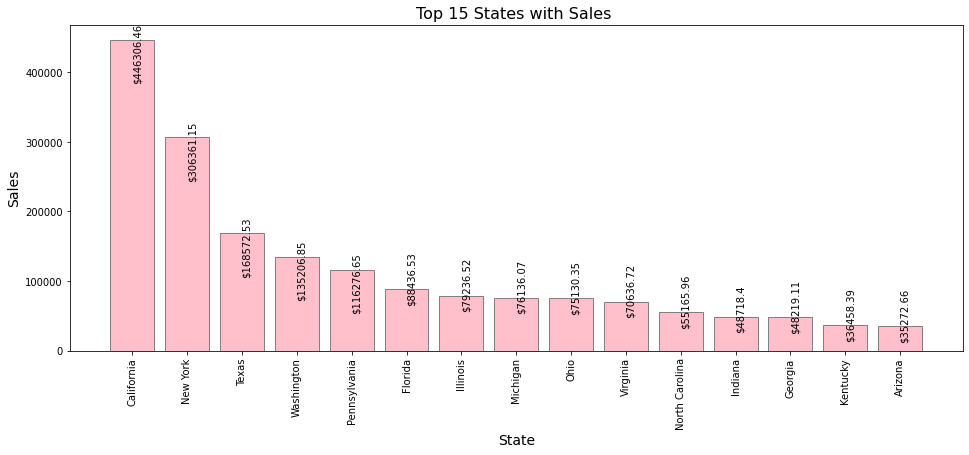

In [29]:
plt.figure(figsize=(16,6))
plt.bar(top_states['State'],top_states['Sales'],color='pink',edgecolor='gray')
plt.title("Top 15 States with Sales ",fontsize=16)
plt.xlabel('State',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xticks(rotation='vertical')

for k,v in top_states['Sales'].items():
    if v> 100000:
        plt.text(k,v-60000,f'${str(v)}',rotation=90)
    else:
         plt.text(k,v-20000,f'${str(v)}',rotation=90)

In [30]:
top_cities=df.groupby('City').sum().sort_values('Sales',ascending=False).head(15)
top_cities=top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


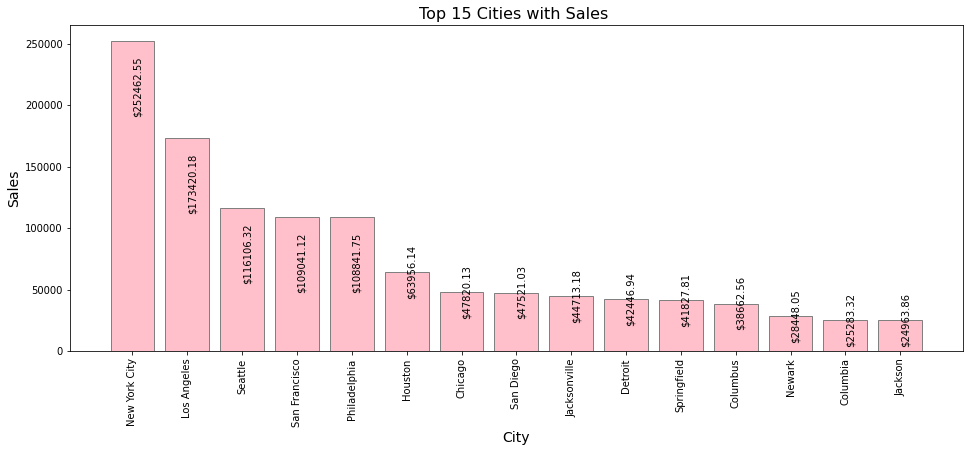

In [31]:
plt.figure(figsize=(16,6))
plt.bar(top_cities['City'],top_cities['Sales'],color='pink',edgecolor='gray')
plt.title("Top 15 Cities with Sales ",fontsize=16)
plt.xlabel('City',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xticks(rotation='vertical')

for k,v in top_cities['Sales'].items():
    if v> 100000:
        plt.text(k,v-60000,f'${str(v)}',rotation=90)
    else:
         plt.text(k,v-20000,f'${str(v)}',rotation=90)